In [1]:
import numpy as np
import visualization
from NeuralNetwork import*
np.random.seed(1)

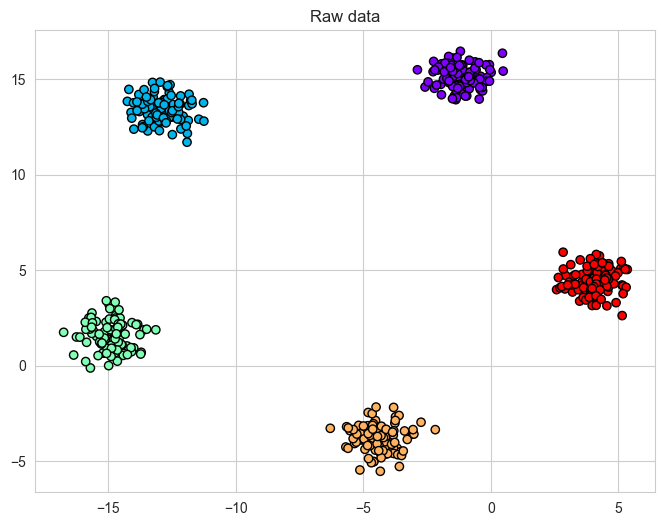

In [25]:
# load data
data = np.loadtxt('tren_data1___09.txt')
# data = np.loadtxt('tren_data2___09.txt')

visualization.plot_data(data, title='Raw data')

In [3]:
# shuffle data
data = np.random.permutation(data)
data_train = data[:int(len(data)*0.8)]
data_test = data[int(len(data)*0.8):]
x_train = data_train[:,:-1].T
y_train_raw = data_train[:,-1]
x_test = data_test[:,:-1].T
y_test = data_test[:,-1]
num_classes = len(np.unique(y_train_raw))

# to one hot
def to_one_hot(y, num_classes):
    y = y.astype(int)
    one_hot = np.zeros((num_classes, y.shape[0]), dtype=int)
    for i in range(y.shape[0]):
        one_hot[y[i]-1, i] = 1
    return one_hot
y_train = to_one_hot(y_train_raw, num_classes)
y_test = y_test.reshape(1, y_test.shape[0])

In [4]:
# data preprocessing for one vs all
y_train_binary = {}
for i in range(num_classes):
    y_train_binary[i] = np.array([1 if y_train_raw[j] == i+1 else 0 for j in range(len(y_train_raw))])
# y_train_binary = np.array(y_train_binary)
print(y_train_raw.shape)
print(y_train_binary[3].shape)

(400,)
(400,)


In [5]:
print ('Number of training examples: ', x_train.shape[1])
print ('Number of testing examples: ', x_test.shape[1])
print ('------')
print ('x_train shape: ', x_train.shape)
print ('y_train shape: ', y_train.shape)
print ('x_test shape: ', x_test.shape)
print ('y_test shape: ', y_test.shape)
print ('------')
print ('Number of classes: ', num_classes)

Number of training examples:  400
Number of testing examples:  100
------
x_train shape:  (2, 400)
y_train shape:  (5, 400)
x_test shape:  (2, 100)
y_test shape:  (1, 100)
------
Number of classes:  5


# Multi-class classification

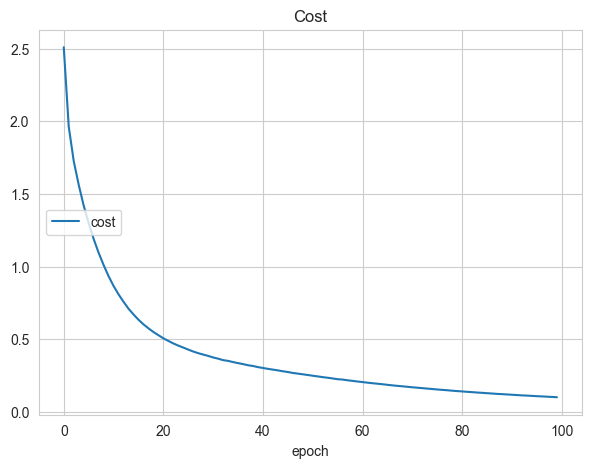

Cost after epoch 99: 0.004571792086049981


In [6]:
input_layer = x_train.shape[0] # set input layer size
dims = [input_layer,12, 6, 5] # set layer number and sizes

# parameters, costs = model(x_train, y_train, dims, learning_rate=0.0075, epochs = 2000, print_cost = True)
nn = DNNClassifier(dims, [DNNClassifier.relu,DNNClassifier.relu, DNNClassifier.softmax])
# costs = nn.train(x_train, y_train, learning_rate=0.0075, epochs = 100, batch_size=10, print_cost = True)
costs = nn.train(x_train, y_train, learning_rate=0.00006, epochs = 100, batch_size=1, print_cost = True)

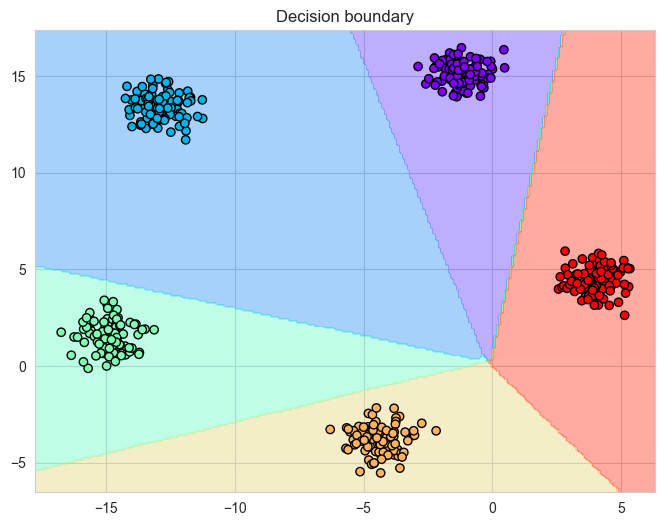

In [7]:
%matplotlib inline
visualization.plot_decision_boundary(data, nn, title='Decision boundary')


In [8]:
A = nn.forward_propagation(x_test)

accuracy:        1.0
confusion matrix: 


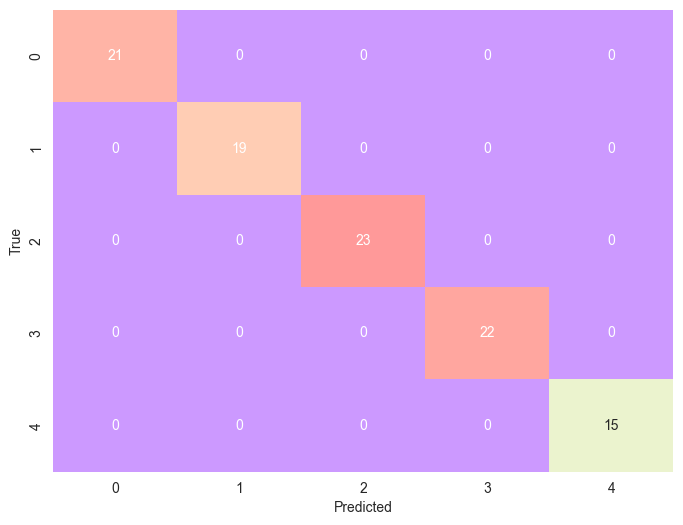

In [9]:
accuracy, confusion_matrix = nn.evaluate(x_test, y_test, confusion_matrix=True)
print('accuracy:       ', accuracy)
print('confusion matrix: ')
visualization.plot_confusion_matrix(confusion_matrix)

In [10]:
print(A.shape[0])
preds = np.argmax(A, axis=0)
print(preds)
print(np.array(y_test, dtype=int)[0])
print(nn.forward_propagation(x_test))
print(nn.predict(x_test))

5
[1 0 3 2 4 0 2 1 4 2 2 1 1 0 4 1 3 3 2 1 1 2 4 1 1 2 3 2 3 0 1 0 0 2 3 1 3
 3 0 0 0 2 0 4 0 4 3 4 0 1 4 1 4 2 2 2 3 3 0 3 0 3 3 0 4 1 0 3 2 2 0 0 3 4
 1 2 3 4 4 3 2 2 1 2 3 2 0 4 1 1 4 3 1 2 3 2 0 3 2 0]
[2 1 4 3 5 1 3 2 5 3 3 2 2 1 5 2 4 4 3 2 2 3 5 2 2 3 4 3 4 1 2 1 1 3 4 2 4
 4 1 1 1 3 1 5 1 5 4 5 1 2 5 2 5 3 3 3 4 4 1 4 1 4 4 1 5 2 1 4 3 3 1 1 4 5
 2 3 4 5 5 4 3 3 2 3 4 3 1 5 2 2 5 4 2 3 4 3 1 4 3 1]
[[5.19004259e-02 9.80225802e-01 1.54649248e-03 3.40798898e-04
  1.68852218e-03 9.53605620e-01 4.02483606e-03 4.99970508e-02
  2.41255435e-03 2.85846082e-03 1.24308527e-03 4.54405360e-02
  4.57031852e-02 9.07417710e-01 9.76053242e-03 4.83686918e-02
  9.17860844e-05 1.12752944e-04 3.12650932e-03 4.91355445e-02
  4.26401606e-02 2.65124391e-04 1.90013003e-02 4.60764140e-02
  4.24847540e-02 2.82713695e-03 8.36133516e-05 2.91101766e-04
  1.28859348e-04 9.57435507e-01 5.21775499e-02 6.45139137e-01
  9.88145616e-01 5.02436871e-04 1.18183180e-05 3.93276693e-02
  1.35787085e-04 2.17592642e-05 

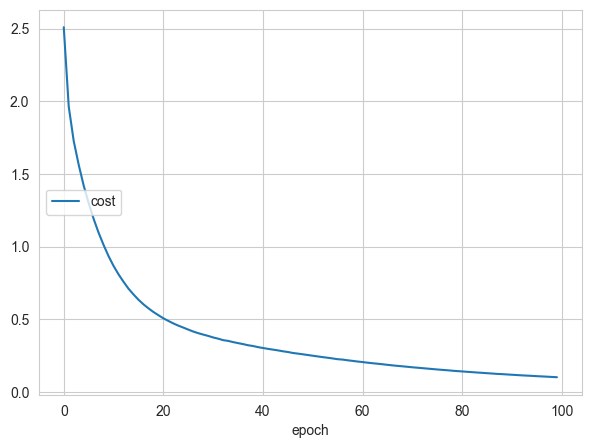

In [11]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(cost, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    # for label,data in data_dict.items():
    #     plt.plot(data, label=label)
    plt.plot(cost, label='cost')
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show()


# Then in a loop you populate a dictionary and you pass it to live_plot():

# data = collections.defaultdict(list)
cost_history = []
for i in range(len(costs)):
    # data['foo'].append(np.random.random())
    # data['bar'].append(np.random.random())
    # data['baz'].append(np.random.random())
    cost_history.append(costs[i])
    live_plot(cost_history)

In [12]:
nn.activations

[<function NeuralNetwork.DNNClassifier.relu(Z, derivative=False)>,
 <function NeuralNetwork.DNNClassifier.relu(Z, derivative=False)>,
 <function NeuralNetwork.DNNClassifier.softmax(Z, derivative=False)>]

# One vs all

In [13]:
input_layer = x_train.shape[0] # set input layer size
dims = [input_layer,2, 1] # set layer number and sizes

nns = {}

for i in range(num_classes):
    print('class: ', i+1)
    nn = DNNClassifier(dims, [DNNClassifier.sigmoid, DNNClassifier.sigmoid])
    y_train_binary[i] = y_train_binary[i].reshape(1, y_train_binary[i].shape[0]) # UNCOMMENT THIS LINE FOR ONE VS ALL
    costs = nn.train(x_train, y_train_binary[i], learning_rate=0.06, epochs = 100, batch_size=5, print_cost = True, plot_cost=False)
    nns[i] = nn


class:  1
Training model...
Cost after epoch 0: 0.532014020411752
Cost after epoch 1: 0.4368885016292342
Cost after epoch 2: 0.4707777352002469
Cost after epoch 3: 0.4343671093618916
Cost after epoch 4: 0.44333143468537795
Cost after epoch 5: 0.3684961649614896
Cost after epoch 6: 0.05657669292923111
Cost after epoch 7: 0.3832701931284815
Cost after epoch 8: 0.2936139739401336
Cost after epoch 9: 0.07467404985614359
Cost after epoch 10: 0.07140832347323256
Cost after epoch 11: 0.1303203716245403
Cost after epoch 12: 0.16618517141959668
Cost after epoch 13: 0.11660586295062755
Cost after epoch 14: 0.18148186186928605
Cost after epoch 15: 0.17216329511039102
Cost after epoch 16: 0.09238981465252624
Cost after epoch 17: 0.2776820824732494
Cost after epoch 18: 0.12116050237979384
Cost after epoch 19: 0.25065756952935025
Cost after epoch 20: 0.03238064500240007
Cost after epoch 21: 0.04638163319901591
Cost after epoch 22: 0.04213017602693149
Cost after epoch 23: 0.08603084676117669
Cost aft

In [14]:
one_vs_all_nn = OneVsAllClassifier(dims, [DNNClassifier.sigmoid, DNNClassifier.sigmoid], num_classes)
one_vs_all_nn.train(x_train, y_train_raw, learning_rate=0.06, epochs = 100, batch_size=5, print_cost = True)

Training classifier 0...
Training model...
Cost after epoch 0: 0.532014020411752
Cost after epoch 1: 0.4368885016292342
Cost after epoch 2: 0.4707777352002469
Cost after epoch 3: 0.4343671093618916
Cost after epoch 4: 0.44333143468537795
Cost after epoch 5: 0.3684961649614896
Cost after epoch 6: 0.05657669292923111
Cost after epoch 7: 0.3832701931284815
Cost after epoch 8: 0.2936139739401336
Cost after epoch 9: 0.07467404985614359
Cost after epoch 10: 0.07140832347323256
Cost after epoch 11: 0.1303203716245403
Cost after epoch 12: 0.16618517141959668
Cost after epoch 13: 0.11660586295062755
Cost after epoch 14: 0.18148186186928605
Cost after epoch 15: 0.17216329511039102
Cost after epoch 16: 0.09238981465252624
Cost after epoch 17: 0.2776820824732494
Cost after epoch 18: 0.12116050237979384
Cost after epoch 19: 0.25065756952935025
Cost after epoch 20: 0.03238064500240007
Cost after epoch 21: 0.04638163319901591
Cost after epoch 22: 0.04213017602693149
Cost after epoch 23: 0.08603084676

[2, 1, 4, 3, 5, 1, 3, 2, 5, 3, 3, 2, 2, 1, 5, 2, 4, 4, 3, 2, 2, 3, 5, 2, 2, 3, 4, 3, 4, 1, 2, 1, 1, 3, 4, 2, 4, 4, 1, 1, 1, 3, 1, 5, 1, 5, 4, 5, 1, 2, 5, 2, 5, 3, 3, 3, 4, 4, 1, 4, 1, 4, 4, 1, 5, 2, 1, 4, 3, 3, 1, 1, 4, 5, 2, 3, 4, 5, 5, 4, 3, 3, 2, 3, 4, 3, 1, 5, 2, 2, 5, 4, 2, 3, 4, 3, 1, 4, 3, 1]
[[2. 1. 4. 3. 5. 1. 3. 2. 5. 3. 3. 2. 2. 1. 5. 2. 4. 4. 3. 2. 2. 3. 5. 2.
  2. 3. 4. 3. 4. 1. 2. 1. 1. 3. 4. 2. 4. 4. 1. 1. 1. 3. 1. 5. 1. 5. 4. 5.
  1. 2. 5. 2. 5. 3. 3. 3. 4. 4. 1. 4. 1. 4. 4. 1. 5. 2. 1. 4. 3. 3. 1. 1.
  4. 5. 2. 3. 4. 5. 5. 4. 3. 3. 2. 3. 4. 3. 1. 5. 2. 2. 5. 4. 2. 3. 4. 3.
  1. 4. 3. 1.]]
1.0
1.0


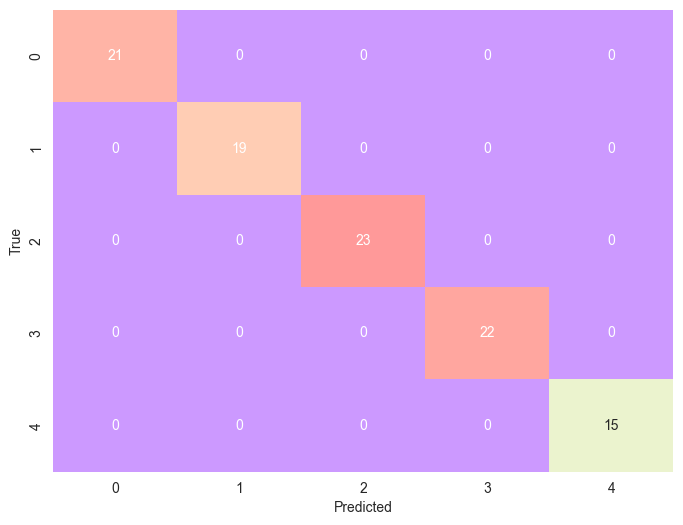

In [15]:
print(one_vs_all_nn.predict(x_test))
print(y_test)
print(one_vs_all_nn.evaluate(x_test, y_test))
acc, conf = one_vs_all_nn.evaluate(x_test, y_test, confusion_matrix=True)
print(acc)
visualization.plot_confusion_matrix(conf)

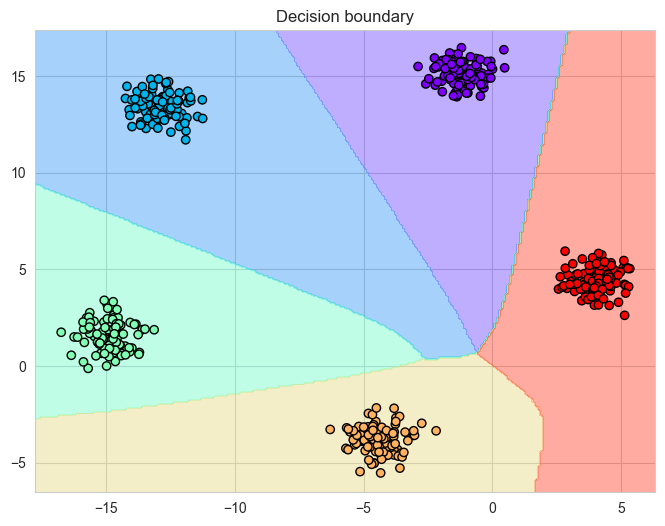

In [26]:
visualization.plot_decision_boundary(data, one_vs_all_nn, title='Decision boundary')

In [16]:
# preds = {}
# for i in range(num_classes):
#     preds[i] = nns[i].forward_propagation(x_test)[0]

preds = [None] * 5
for i in range(5):
    preds[i] = nns[i].forward_propagation(x_test)[0]

print("Expected: ", np.array(y_test, dtype=int)[0])

onevsall_preds = []
for i in range(len(preds[0])):
    # onevsall_preds.append(np.argmax([preds[0][i], preds[1][i], preds[2][i], preds[3][i], preds[4][i]])+1)
    onevsall_preds.append(np.argmax([preds[j][i] for j in range(num_classes)])+1)
    
onevsall_preds = [np.argmax([preds[j][i] for j in range(num_classes)])+1 for i in range(len(preds[0]))]
        
print("Predicted: ", onevsall_preds)

print("Accuracy: ", np.sum(np.array(y_test, dtype=int)[0] == onevsall_preds))




Expected:  [2 1 4 3 5 1 3 2 5 3 3 2 2 1 5 2 4 4 3 2 2 3 5 2 2 3 4 3 4 1 2 1 1 3 4 2 4
 4 1 1 1 3 1 5 1 5 4 5 1 2 5 2 5 3 3 3 4 4 1 4 1 4 4 1 5 2 1 4 3 3 1 1 4 5
 2 3 4 5 5 4 3 3 2 3 4 3 1 5 2 2 5 4 2 3 4 3 1 4 3 1]
Predicted:  [2, 1, 4, 3, 5, 1, 3, 2, 5, 3, 3, 2, 2, 1, 5, 2, 4, 4, 3, 2, 2, 3, 5, 2, 2, 3, 4, 3, 4, 1, 2, 1, 1, 3, 4, 2, 4, 4, 1, 1, 1, 3, 1, 5, 1, 5, 4, 5, 1, 2, 5, 2, 5, 3, 3, 3, 4, 4, 1, 4, 1, 4, 4, 1, 5, 2, 1, 4, 3, 3, 1, 1, 4, 5, 2, 3, 4, 5, 5, 4, 3, 3, 2, 3, 4, 3, 1, 5, 2, 2, 5, 4, 2, 3, 4, 3, 1, 4, 3, 1]
Accuracy:  100


[[0.0074271  0.0074271  0.0074271  ... 0.02182142 0.02158791 0.02139608]]
[[0.01169775 0.01169775 0.01169775 ... 0.01119392 0.01119392 0.01119392]]
[[0.26609661 0.25145217 0.23747277 ... 0.01459734 0.01459733 0.01459732]]
[[0.98928246 0.98928334 0.9892842  ... 0.00265777 0.00265777 0.00265777]]
[[0.00260595 0.00260595 0.00260595 ... 0.99038132 0.9904114  0.99043674]]


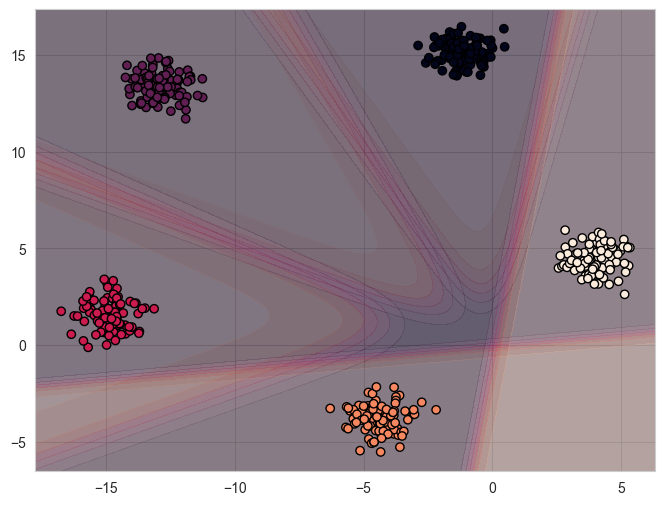

In [17]:
dt = data[:, :-1]
x_min, x_max = dt[:, 0].min() - 1, dt[:, 0].max() + 1
y_min, y_max = dt[:, 1].min() - 1, dt[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
plt.figure(figsize=(8, 6))
inp = np.c_[xx.ravel(), yy.ravel()].T
for i in range(num_classes):
    boundary = nns[i].forward_propagation(inp)
    print(boundary)
# Put the result into a color plot
    boundary = np.array(boundary)
    boundary = boundary.reshape(xx.shape)

    plt.contourf(xx, yy, boundary, alpha=0.2)
plt.scatter(data[:, 0], data[:, 1], c=(data[:, 2]), edgecolors='k')
plt.show()

In [18]:
import utilities
X2,y2 = utilities.multiClass_Data(N=200,K=3)
# change the numbering of classes from 0,1,2 to 2,1,0
y2_temp = y2.copy()
# y2[y2_temp==0] = 2
# y2[y2_temp==1] = 0
# y2[y2_temp==2] = 1


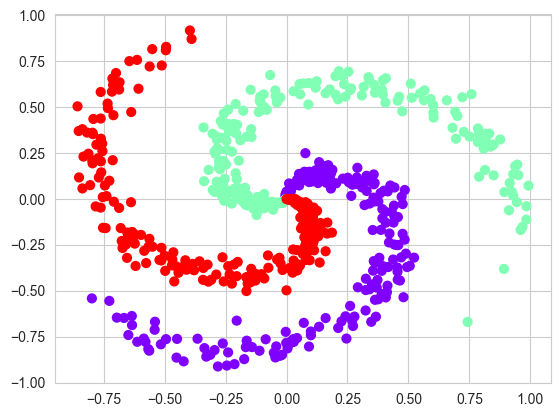

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=40, cmap=plt.cm.rainbow)
plt.show()
X2 = X2.T  # Reshaping as (n x m)
# Converting to one hot matrix
y2_hot = to_one_hot(y2, 3)

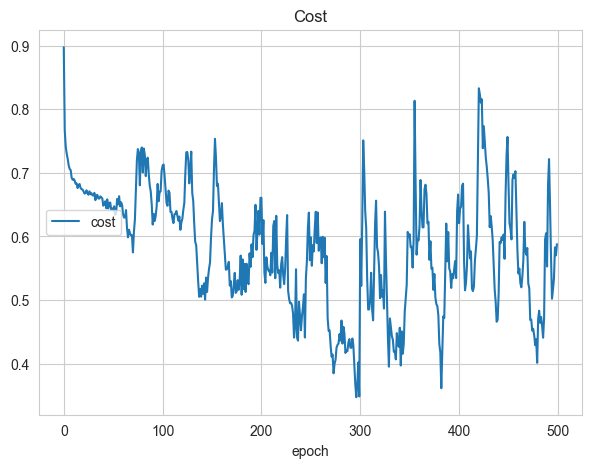

Cost after epoch 499: 0.5537495251542932


In [20]:

af2 = 'relu'
# layer_dims2 = [X2.shape[0],24,12,y2_hot.shape[0]]
# nn2 = DNNClassifier(layer_dims2, [DNNClassifier.relu,DNNClassifier.relu, DNNClassifier.sigmoid])
# a= nn2.train(X2, y2_hot, learning_rate=0.006, epochs = 4000, batch_size=50, print_cost = True)

# layer_dims2 = [X2.shape[0],12,6,y2_hot.shape[0]]
# nn2 = DNNClassifier(layer_dims2, [DNNClassifier.relu,DNNClassifier.relu, DNNClassifier.sigmoid])
# a= nn2.train(X2, y2_hot, learning_rate=0.06, epochs = 1000, batch_size=50, print_cost = True)

layer_dims2 = [X2.shape[0],64,32,y2_hot.shape[0]]
nn2 = DNNClassifier(layer_dims2, [DNNClassifier.relu,DNNClassifier.relu, DNNClassifier.softmax])
a= nn2.train(X2, y2_hot, learning_rate=0.06, epochs = 500, batch_size=10, print_cost = True)


(2, 600)
(600,)
(1, 600)


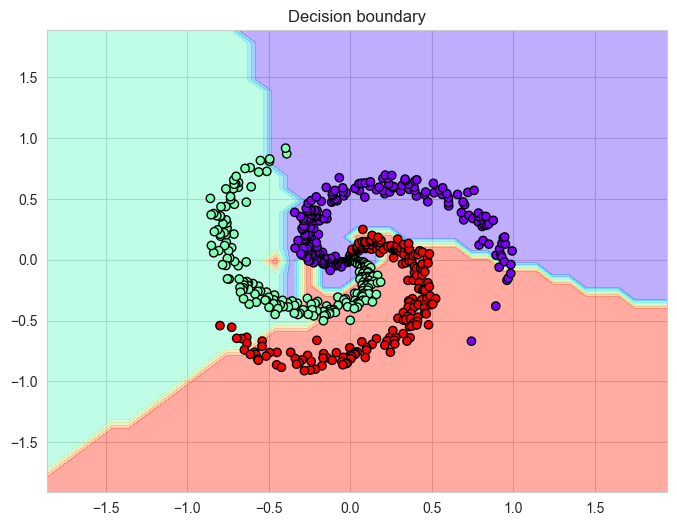

In [21]:
%matplotlib inline
print(X2.shape)
print(y2.shape)
y2[y2_temp==0] = 2
y2[y2_temp==1] = 0
y2[y2_temp==2] = 1
y22 = y2.reshape(1, y2.shape[0])
print(y22.shape)
# conbine X and y to matrix to plot
# x shape (600, 2)
# y shape (600, )
data = np.concatenate((X2.T, y22.T), axis=1)
visualization.plot_decision_boundary(data, nn2, title='Decision boundary')

In [22]:
a = np.array([[1, 2,5], [3, 4,5]])

b = np.array([[5, 6]])

print(a.shape)
print(b.shape)
print(np.concatenate((a, b.T), axis=1))

(2, 3)
(1, 2)
[[1 2 5 5]
 [3 4 5 6]]


In [23]:
print(data.shape)

(600, 3)
